In [2]:
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import matplotlib.animation as animation
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import matplotlib

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import matplotlib.patches as mpatches


# class AnyObject:
#     pass


# class AnyObjectHandler:
#     def legend_artist(self, legend, orig_handle, fontsize, handlebox):
#         x0, y0 = 0, 0
#         width, height = 5, 10
#         patch = mpatches.Rectangle([x0, y0], width, height, facecolor='blue',
#                                    edgecolor='black', hatch='xx', lw=2,
#                                    transform=handlebox.get_transform())
#         handlebox.add_artist(patch)
#         return patch


# plt.legend([AnyObject(), AnyObject()], ['My first handler','2'],
#            handler_map={AnyObject: AnyObjectHandler()})

In [4]:
def get_poses( N, r = 1 ):
    thetas = np.arange(N) / N * 2 * np.pi
    return np.cos(thetas) * r, np.sin(thetas) * r

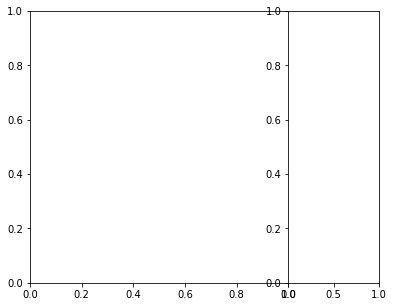

In [5]:
figure_ratio = 0.35;
fig = plt.figure(figsize=(5*(0.9+figure_ratio), 5 ) );
fig.subplots_adjust(wspace = 0);
gs = gridspec.GridSpec(1, 2, width_ratios=[1, figure_ratio]); 
ax = plt.subplot(gs[0]);
ay = plt.subplot(gs[1]);
# az = plt.subplot(gs[2]);


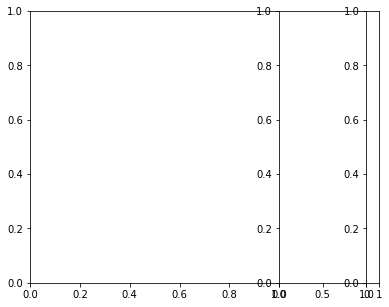

In [6]:
figure_ratio = 0.35;
fig = plt.figure(figsize=(5*(0.9+figure_ratio), 5) );
fig.subplots_adjust(wspace = 0);
gs = gridspec.GridSpec(1, 3, width_ratios=[1, figure_ratio, 0.05]); 
ax = plt.subplot(gs[0]);
ay = plt.subplot(gs[1]);
az = plt.subplot(gs[2]);



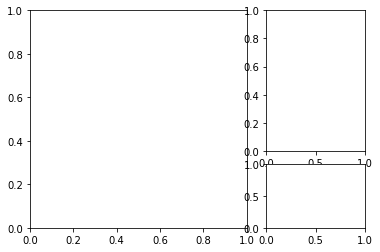

In [7]:
fig = plt.figure()
# fig.suptitle("Controlli۲ng spacing around and between subplots")

# gs1 = GridSpec(3, 3, left=0.05, right=0.48, wspace=0.05)
# ax1 = fig.add_subplot(gs1[:-1, :])
# ax2 = fig.add_subplot(gs1[-1, :-1])
# ax3 = fig.add_subplot(gs1[-1, -1])

gs2 = GridSpec(3, 3)
ax = fig.add_subplot(gs2[:, :-1])
ay = fig.add_subplot(gs2[:-1, -1])
az = fig.add_subplot(gs2[-1, -1])

pos = az.get_position()
pos.y0 += 0.24
pos.y1 += 0.24


In [8]:
matplotlib.rcParams.update({'font.size': 9})


az.set_position(pos)



alpha = 1
def animate(t, create_legend = True):
    
    ax.clear()
    az.clear()
    ay.clear()
    N = len(agents_history[0])   

    x, y = get_poses(N)
    
    colors = np.array([ 'greenyellow', 'red' ])
    all_colors = colors[agents_history[t]['state']]
    
    ax.scatter( x, y, c = all_colors, s = 120, edgecolors='k', vmin=0, vmax=1, marker='p' )


    eps = 0.05
    for i in range(N):
        ax.add_patch(Rectangle(xy=(x[i] + eps, y[i] + eps) ,width=0.1, height=0.2 * agents_history[t][i]['resource'], linewidth=1, color='deepskyblue', fill=True))

    for i in range(N):
        ax.add_patch(Rectangle(xy=(x[i] + eps, y[i] + eps) ,width=0.1, height=0.2 , linewidth=1, color='k', fill=False))

    w_num = len(w_resources_history[0])

    x_w, y_w = get_poses(w_num, 0.5)


    for ind, interaction in interaction_history.loc[ interaction_history['t'] == t ].iterrows():
        agent = interaction['agent']
        w_resource = interaction['w_resource']
        ax.plot( (x_w[ w_resource ], x[ agent ])\
            , ( y_w[ w_resource] , y[ agent ] ) , 'k', linewidth = 1, linestyle = '--' )
#         ax.arrow( x[ agent ], y[ agent ]\
#             , x_w[ w_resource ] - x[ agent ], y_w[ w_resource] - y[ agent ]\
#                 ,head_width = 0.03, color = 'k', linewidth = 1, linestyle = '-' )





    im = ax.scatter( x_w, y_w, c = w_resources_history[t]['pollution'], cmap = 'YlOrRd', s = 300 * w_resources_history[t]['amount'], edgecolors='k', vmin=0, vmax=1 )
#     ax.scatter( x_w, y_w, c = w_resources_history[t]['pollution'], cmap = "#69d", s = 300 * w_resources_history[t]['amount'], edgecolors='k', vmin=0, vmax=1 )


    ax.axis('off')
    # ay.axis('off')

    ax.axis('equal')
    az.set_aspect(0.1)
#     az.set_anchor([0,0,0,0])

#     plt.show()
    #"""
    const_colorbar = fig.colorbar(im, cax=az, orientation = 'horizontal', ticks=[0,1])
#     az.set_xticks( [0,1] )
#     ax.set_xticklabels(labels=['low', 'high'], rotation=90, ha='right')
    
#     cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
    const_colorbar.ax.set_xticklabels(['low pollution', 'high pollution'])  # vertically oriented colorbar

    if create_legend:
        #grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        ay.axis('off')
        legend_elements = [
                       Line2D([0], [0], marker='p', color='w', markeredgecolor='k', label='S Household',
                              markerfacecolor='greenyellow', markersize=10, alpha = alpha),
                              
                       Line2D([0], [0], marker='p', color='w', markeredgecolor='k', label='I Household',
                              markerfacecolor='red', markersize=10, alpha = alpha) ,
                              
#                        Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='Small W Rsrc',
#                               markerfacecolor='snow', markersize=5, alpha = alpha),
            
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='W Rsrc Size',
                              markerfacecolor='snow', markersize=10, alpha = alpha),
                           
                        Rectangle(xy=(0,0) ,width=0.05, height=1000 , linewidth=1\
                                  ,label='Household Rsrc', facecolor = 'deepskyblue', edgecolor='k', fill=True)
    ]
        ay.legend( handles=legend_elements, loc = 'center', frameon = False)
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 2

In [9]:
agents_history = np.load('../Results/agents_history.npy')
w_resources_history = np.load('../Results/w_resources_history.npy')
interaction_history = pd.read_csv('../Results/interaction_history.csv')


ani = animation.FuncAnimation(fig, animate, save_count = 999999)
#ani = animation.FuncAnimation(fig, animate)
dpi = 200
# file_name = str(time.gmtime()[0:5]) + '.GIF'
# ani.save( file_name ,dpi=dpi, writer = 'imagemagick')

writer = animation.writers['ffmpeg'](fps = 1)
file_name = str(time.gmtime()[0:5]) + '.mp4'
ani.save( file_name, dpi=dpi, writer = writer)

file_name

IndexError: index 20 is out of bounds for axis 0 with size 20

### 